---

**[Optional exercise]**

Create a similar map for the rook neighbors of polygon `E01006580`. 

How would it differ if the spatial weights were created based on the queen criterion?

---

---

**[Optional exercise]**

Explore the help for functions `weights.DistanceBand.from_array` and try to use them to replicate `w_dist1kmB` and `w_dist1kmC`.

---

---

**[Optional extension. Lecture figure]**

Below is how to build a visualization for distance-based weights that displays the polygons, highlighting the focus and its neighbors, and then overlays the centroids and the buffer used to decide whether a polygon is a neighbor or not. Since this is distance-based weights, there needs to be a way to establish distance between two polygons and, in this case, the distance between their centroids is used.

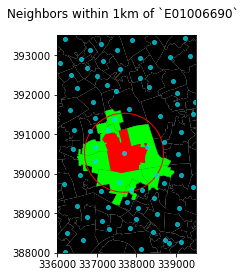

In [29]:
# Setup figure
f, ax = plt.subplots(1, figsize=(4, 4))
# Plot base layer of polygons
imd.plot(ax=ax, facecolor='k', linewidth=0.1)
# Select focal polygon
# NOTE we pass both the area code and the column name
#      (`geometry`) within brackets!!!
focus = imd.loc[['E01006690'], ['geometry']]
# Plot focal polygon
focus.plot(facecolor='red', alpha=1, linewidth=0, ax=ax)
# Plot neighbors
neis = imd.loc[w_dist1kmC['E01006690'], :]
neis.plot(ax=ax, facecolor='lime', linewidth=0)
# Plot 1km buffer
buf = focus.centroid.buffer(1000)
buf.plot(edgecolor='red', facecolor='none', ax=ax)
# Plot centroids of neighbor
pts = np.array([(pt.x, pt.y) for pt in imd.centroid])
ax.plot(pts[:, 0], pts[:, 1], color='#00d8ea', 
        linewidth=0, alpha=0.75, marker='o', markersize=4)
# Title
f.suptitle("Neighbors within 1km of `E01006690`")
# Style, zoom and display on screen
ax.set_ylim(388000, 393500)
ax.set_xlim(336000, 339500)
plt.show()

---

---

**[Optional exercise]**

For block weights, create a similar map to that of queen neighbors of polygon `E01006690`.

---

---

**[Optional exercise]**

Explore the spatial lag of `w_queen_score` by constructing a density/histogram plot similar to those created in Lab 2. Compare these with one for `imd_score`. What differences can you tell?

<!--
sns.distplot(imd['imd_score'])

sns.distplot(imd['w_queen_score'])
-->

---

---

**[Optional exercise]**

Create a standardized Moran Plot for each of the components of the IMD:

* Crime
* Education
* Employment
* Health
* Housing
* Income
* Living environment

**Bonus** if you can generate all the plots with a `for` loop.

**Bonus-II** if you explore the functionality of Seaborn's `jointplot` ([link](http://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#plotting-a-regression-in-other-contexts) and [link](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot)) to create a richer Moran plot.

<!--
w_queen.transform = 'R'
for col in ['crime', 'education', 'employment', 'health', 'housing', 'income', 'living_env']:
    stdd = (imd[col] - imd[col].mean()) / imd[col].std()
    sl = pd.Series(ps.lag_spatial(w_queen, stdd), index=stdd.index)
    sns.jointplot(x=stdd, y=sl, kind="reg")
-->

